In [2]:
from product_sub.infrastructure.dataset_builder import DatasetBuilder
from product_sub.domain.data_cleaning import NumImputer, CatImputer
from product_sub.domain.feature_selector import FeatureSelector
import product_sub.settings as stg

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, Pipeline as Pipeline_sickit,  make_pipeline, make_union
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

In [3]:
RANDOM_STATE=42

In [4]:
dataset_merged = DatasetBuilder(
    filename_bank="data.csv", filename_socio="socio_eco.csv"
).create_dataset()
dataset_merged = dataset_merged.drop(columns=stg.COL_RAW_DATE)
X = dataset_merged.drop(columns=stg.COL_RAW_SUBSCRIPTION)
y = dataset_merged[stg.COL_RAW_SUBSCRIPTION].values

In [44]:
dataset_merged

,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,58,Manager,Marie,Tertiaire,0,2143,1,0.0,NaN,261,1,-1,0,NaN,0,1.1,93.994,-36.4
1,123,Technicien,NaN,Secondaire,0,29,1,NaN,NaN,151,1,-1,0,NaN,0,1.1,93.994,-36.4
2,33,Entrepreuneur,Marie,Secondaire,0,2,1,1.0,NaN,76,1,-1,0,NaN,0,1.1,93.994,-36.4
3,47,Col bleu,Marie,NaN,0,1506,1,0.0,NaN,92,1,-1,0,NaN,0,1.1,93.994,-36.4
4,33,NaN,Celibataire,NaN,0,1,0,0.0,NaN,198,1,-1,0,NaN,0,1.1,93.994,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45131,47,Manager,Marie,Tertiaire,0,0,0,0.0,Portable,508,1,-1,0,NaN,1,-1.1,94.601,-49.5
45132,61,Retraite,Marie,Secondaire,0,1058,0,0.0,Portable,277,1,92,5,Succes,0,-1.1,94.601,-49.5
45133,24,Etudiant,Celibataire,Secondaire,0,822,0,0.0,Portable,184,1,91,2,Echec,1,-1.1,94.601,-49.5
45134,70,Retraite,Marie,Secondaire,0,0,0,0.0,Portable,258,1,92,5,Succes,1,-1.1,94.601,-49.5


In [5]:
numeric_transformer = Pipeline_sickit(steps=[
    ('num_imputer', NumImputer()),
    ('scaler', StandardScaler())])
cat_imputer = CatImputer(['JOB_TYPE', 'EDUCATION', 'STATUS'])
categorical_transformer = Pipeline_sickit(steps=[
    ('cat_imputer', cat_imputer ),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])
clf = Pipeline_sickit(steps=[ ('preprocessor' , preprocessor),
                           ('classifier',  LogisticRegression()) ])

In [40]:
X_train, X_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)


X_train = preprocessor.fit_transform(X_train)
smt = SMOTE(sampling_strategy=0.5,random_state=RANDOM_STATE)
pipeline_smt = Pipeline([('smt', smt)])
X_train, y_train= pipeline_smt.fit_resample(X_train, y_train)
#gradient_pipe = full_pipe.fit(X_train, y_train)





JOB_TYPE
STATUS
EDUCATION
CONTACT
RESULT_LAST_CAMPAIGN


In [10]:
X_train.shape

(47883, 38)

In [11]:
dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45136 entries, 0 to 45135
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   AGE                        45136 non-null  int64   
 1   JOB_TYPE                   44850 non-null  category
 2   STATUS                     44008 non-null  category
 3   EDUCATION                  43283 non-null  category
 4   HAS_DEFAULT                45136 non-null  int64   
 5   BALANCE                    45136 non-null  int64   
 6   HAS_HOUSING_LOAN           45136 non-null  int64   
 7   HAS_PERSO_LOAN             43782 non-null  float64 
 8   CONTACT                    32117 non-null  category
 9   DURATION_CONTACT           45136 non-null  int64   
 10  NB_CONTACT                 45136 non-null  int64   
 11  NB_DAY_LAST_CONTACT        45136 non-null  int64   
 12  NB_CONTACT_LAST_CAMPAIGN   45136 non-null  int64   
 13  RESULT_LAST_CAMPAIGN       8197

In [12]:
X_test = preprocessor.fit_transform(X_test)

JOB_TYPE
STATUS
EDUCATION
CONTACT
RESULT_LAST_CAMPAIGN


In [21]:
y_hat = pipeline_smt.predict(X_test)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [12]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      7961
           1       0.26      0.97      0.40      1067

    accuracy                           0.66      9028
   macro avg       0.62      0.80      0.58      9028
weighted avg       0.91      0.66      0.72      9028



In [13]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1)
}

In [15]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()


d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean]}

result_df = pd.DataFrame(data=d)

/home/emilio/.cache/pypoetry/virtualenvs/productsubscription-eds-dm-8u1ePI5K-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/emilio/.cache/pypoetry/virtualenvs/productsubscription-eds-dm-8u1ePI5K-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

In [17]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.854082
1,SVC,0.882777
2,KNN,0.897646
3,Dec Tree,0.884218
4,Grad B CLF,0.896352
5,Rand FC,0.921204
6,Neural Classifier,0.867051


In [18]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

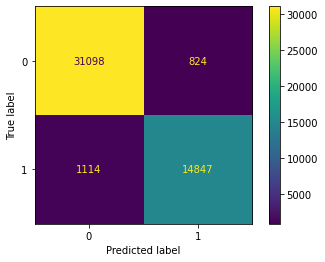

In [19]:
y_pred = xgb_model.predict(X_train)
plot_confusion_matrix(xgb_model,X_train, y_train)


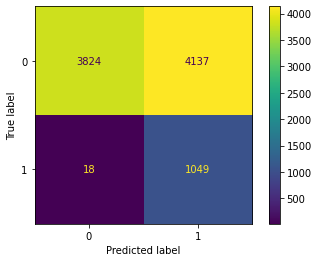

In [21]:
y_test_pred = xgb_model.predict(X_test)
plot_confusion_matrix(xgb_model,X_test, y_test)


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6), 
    "n_estimators": randint(100, 150), 
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=150, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f654530eb20>,
                                        'max_depth':

In [24]:
def print_scores_xgb(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Model with rank: 1
Mean validation score: 0.911 (std: 0.003)
Parameters: {'colsample_bytree': 0.8345272428958741, 'gamma': 0.49722873130541034, 'learning_rate': 0.0827775758032036, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.7975574860733738}

In [25]:
search.best_params_

{'colsample_bytree': 0.8834541132597041,
 'gamma': 0.04079709020012018,
 'learning_rate': 0.03155545883219603,
 'max_depth': 5,
 'n_estimators': 144,
 'subsample': 0.6777095814048169}

In [49]:
candidates = np.flatnonzero(search.cv_results_['rank_test_score'] == 2)
candidates

array([41])

In [26]:
xgb_model = xgb.XGBClassifier(params=search.best_params_)
xgb_model.fit(X_train, y_train)

[20:26:49] WARNING: ../src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'colsample_bytree': 0.8834541132597041,
                      'gamma': 0.04079709020012018,
                      'learning_rate': 0.03155545883219603, 'max_depth': 5,
                      'n_estimators': 144, 'subsample': 0.6777095814048169},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
len(dataset_merged.columns)

18

In [43]:
print(X_test[(y_test == 1) & (y_pred == 0)])

[[-4.27879340e-01 -1.30423354e-01  1.47762517e-01 -1.12443727e+00
  -4.42318103e-01 -1.99711979e-01 -5.69267735e-01 -4.09085379e-01
  -2.92869814e-01  8.85177833e-01  1.62494849e+00 -3.30185876e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.33555727e-01 -1.30423354e-01 -8.55044814e-02  8.89333740e-01
  -4.42318103e-01 -4.78886134e-01  2.33614319e+00 -4.09085379e-01
  -2.92869814e-01 -1.54859320e-01  0.00000000e+00  1.60982192e-15
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.0000

In [41]:
array_nump = X_test[(y_test == 1) & (y_pred == 0)].shape
test = pd.DataFrame(data=array_nump,columns=X_test2.columns)

ValueError: Shape of passed values is (2, 1), indices imply (2, 17)

In [29]:
y_pred.shape

(9028,)

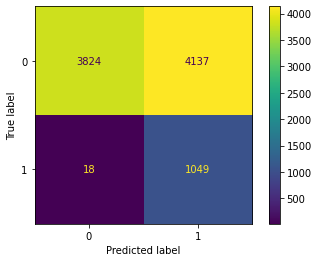

In [27]:
y_pred = xgb_model.predict(X_test)
plot_confusion_matrix(xgb_model,X_test, y_test)

In [54]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

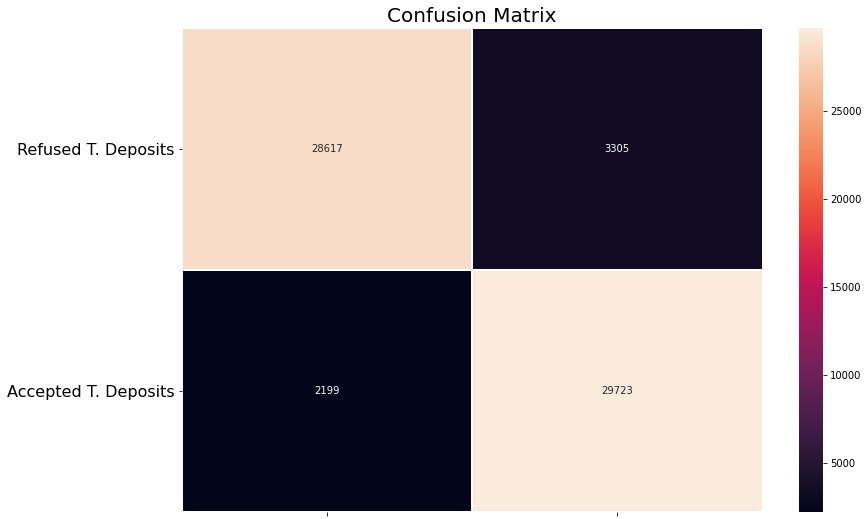

In [55]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [56]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train, y_train_pred))

print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.8999333898510354
Recall Score:  0.9311133387632354


In [45]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.9156463004657188

In [46]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="predict_proba")

/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

In [47]:
y_scores.shape

(63844,)

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

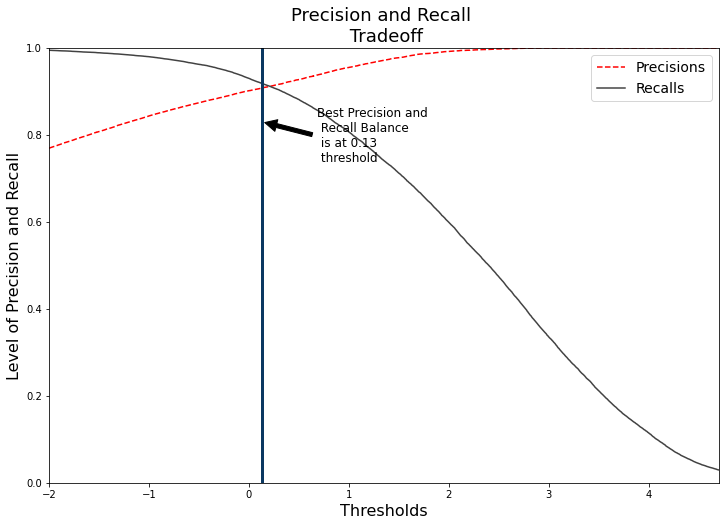

In [49]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

In [50]:
grad_clf.score(X_test, y_test)

ValueError: could not convert string to float: 'Manager'

In [51]:

test = preprocess_pipeline.fit(X, y_train)
test.score(X_test )